# Задача 1
# Постройте график
# Назовите график
# Сделайте именование оси x и оси y
# Сделайте выводы

# 1.1. Скачать следующие данные: kc-house-data 

In [1]:
import pandas as pd
df = pd.read_csv("kc_house_data.csv", sep= ',',encoding='windows-1252')

In [2]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650


In [3]:
import matplotlib.pyplot as plt


In [40]:
import numpy as np 

# 1.2. Изучите стоимости недвижимости

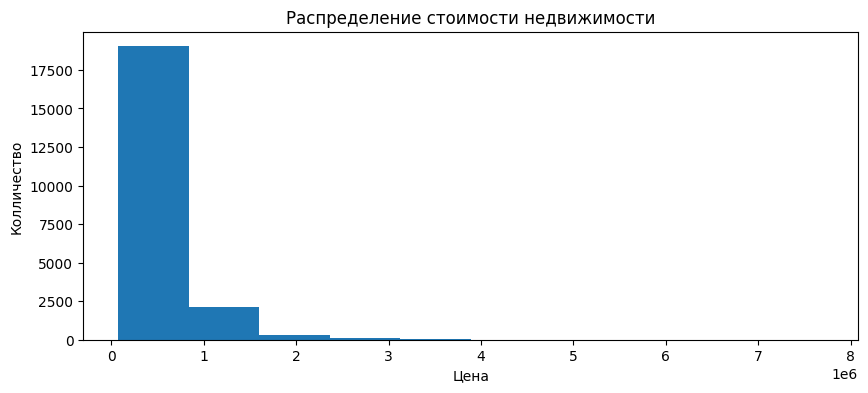

In [17]:
plt.figure(figsize=(10,4))
plt.hist(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Колличество');

# 1.3. Изучите распределение квадратуры жилой

In [8]:
data =  df['sqft_living'].value_counts()
data

sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: count, Length: 1038, dtype: int64

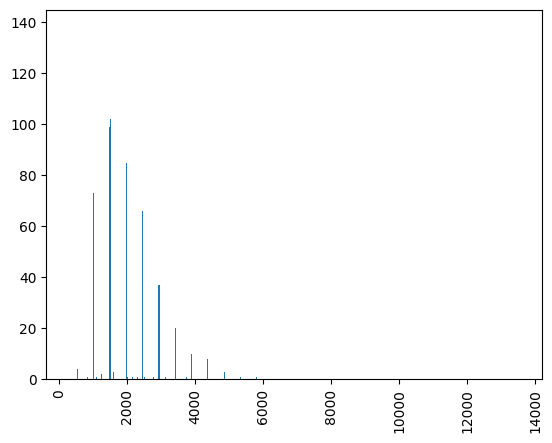

In [9]:
plt.bar(data.index,data.values )
plt.xticks(rotation=90);

Text(0, 0.5, 'Количество')

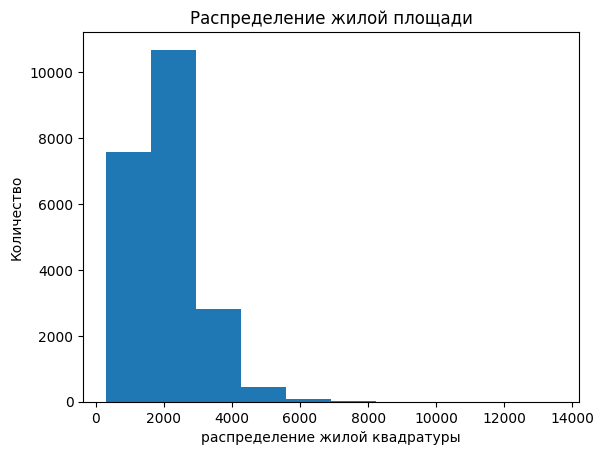

In [10]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой площади')
plt.xlabel('распределение жилой квадратуры')
plt.ylabel('Количество')

# 1.4. Изучите распределение года постройки

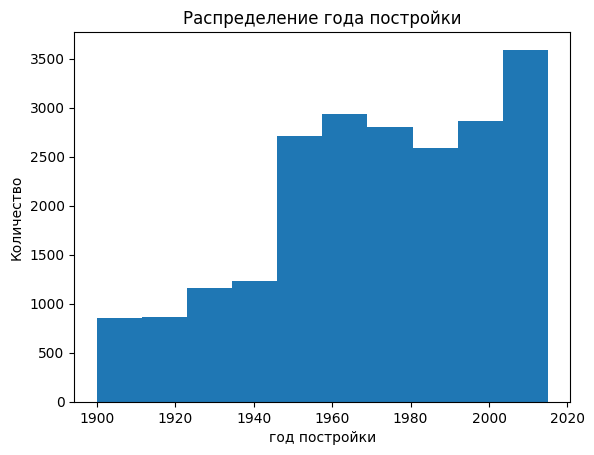

In [11]:
plt.hist(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('год постройки')
plt.ylabel('Количество');

# Вывод: Наибольшее колличество домов по стоимости, колеблеться в пределоах 

In [12]:
data =  df['price'].value_counts()
data

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

# задача 2
# 2.1. Изучите распределение домов от наличия вида на набережную
# Постройте график
# Сделайте выводы

In [26]:
data3 =  df['waterfront'].value_counts()
data3

waterfront
0    21450
1      163
Name: count, dtype: int64

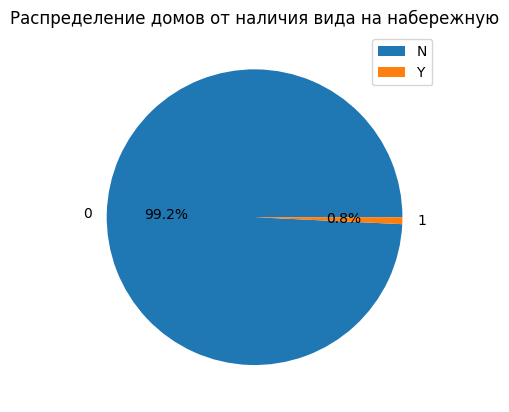

In [33]:
plt.pie(data3.values, autopct='%.1f%%', labels=data3.index)
plt.title('Распределение домов от наличия вида на набережную')
plt.legend('NY')

# Вывод : Домов с видом на набережнную в разф меьше, как видно на графике

In [19]:
data1 =  df['sqft_living'].value_counts()
data1

sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: count, Length: 1038, dtype: int64

# 2.2. Изучите распределение этажей домов

In [21]:
df['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

Text(0, 0.5, 'Количество домов')

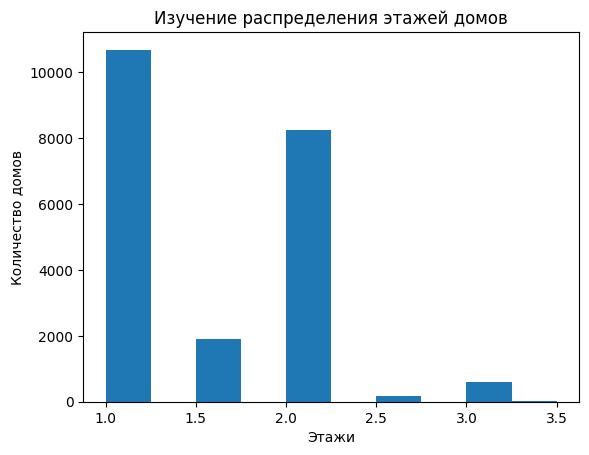

In [22]:
plt.hist(df['floors'])
plt.title('Изучение распределения этажей домов')
plt.xlabel('Этажи')
plt.ylabel('Количество домов')

# 2.3. Изучите распределение состояния домов

In [23]:
df['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

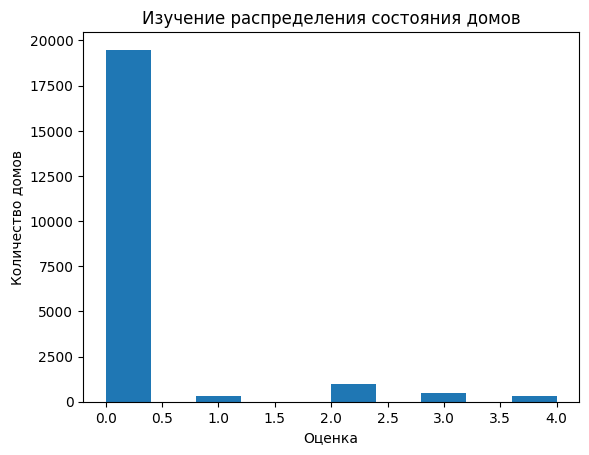

In [24]:
plt.hist(df['view'])
plt.title('Изучение распределения состояния домов')
plt.xlabel('Оценка')
plt.ylabel('Количество домов');

# Задача 3
# Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
# Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [42]:
def formDepData (col1, col2, df):
    data = df.groupby(col1) \
        .agg({col2: 'mean'}) \
        .sort_index().reset_index()
    
    data[col1] = data[col1].apply(
        lambda val:
            str(val) 
    )

    return data

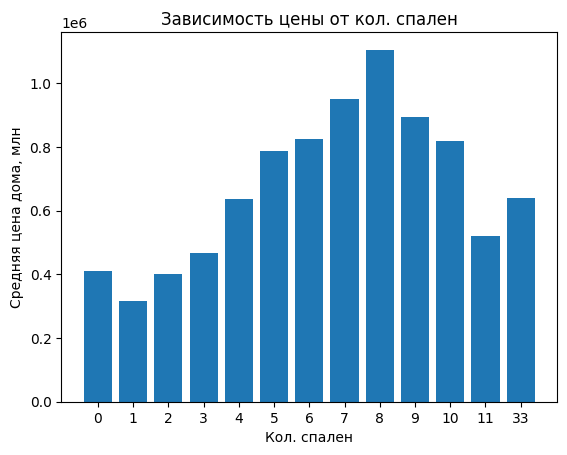

In [43]:
data = formDepData('bedrooms', 'price', df)

plt.bar(
    data['bedrooms'],
    data['price']
)

plt.title("Зависимость цены от кол. спален")
plt.xlabel("Кол. спален")
plt.ylabel("Средняя цена дома, млн");

# Вывод: Дома без спален, дороже, чем дома с 2-мя спальнями. У домов с 1 по 8 спален прослеживается плавный рост цены. Дома с большим количеством спален уменьшаются в цене.

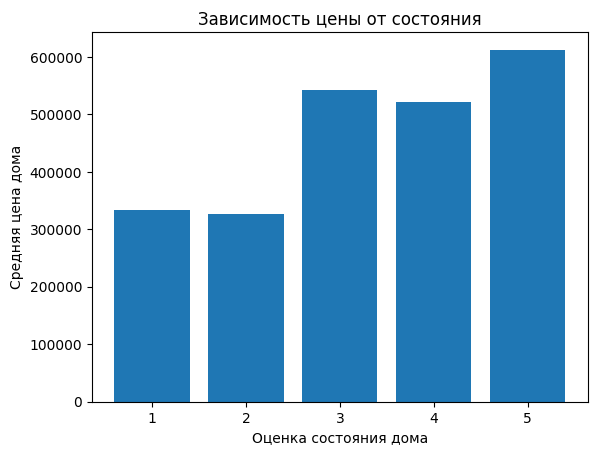

In [44]:
data = formDepData('condition', 'price', df)

plt.bar(
    data['condition'],
    data['price']
)

plt.title("Зависимость цены от состояния")
plt.xlabel("Оценка состояния дома")
plt.ylabel("Средняя цена дома");

# Вывод: Увеличение цены для домов в лучшем состоянии. Скорее всего здесь цена зависит от спроса.

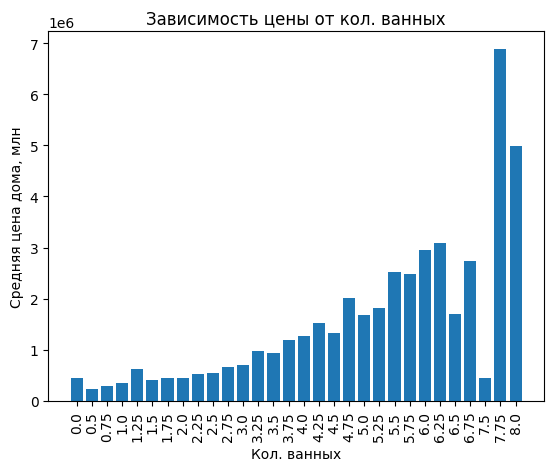

In [45]:
data = formDepData('bathrooms', 'price', df)

plt.bar(
    data['bathrooms'],
    data['price']
)

plt.xticks(rotation=90)
plt.title("Зависимость цены от кол. ванных")
plt.xlabel("Кол. ванных")
plt.ylabel("Средняя цена дома, млн");

# Вывод: Наблюдается рост цены с увелечение колличества ванных комнат.

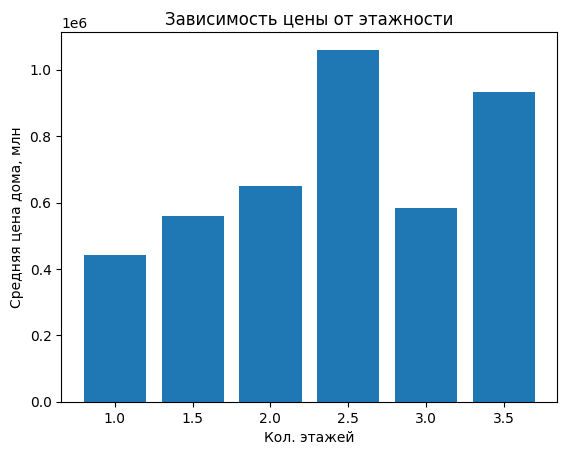

In [46]:
data = formDepData('floors', 'price', df)

plt.bar(
    data['floors'],
    data['price']
)

plt.title("Зависимость цены от этажности")
plt.xlabel("Кол. этажей")
plt.ylabel("Средняя цена дома, млн");

# Вывод: Для домов с этажностью с 1 по 2.5 прослеживается рост цены. Дома с большей этажностью имеют меньшую цену, которая, также имеет тенденцию к увеличению при добавлении полуэтажа. Изменение закономерности для домов с этажностью 3.5 может быть связана с очень небольшой их долей.